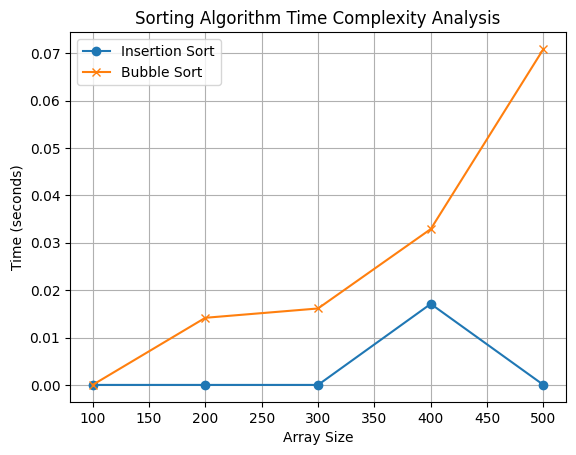

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Generate a k-nearly sorted array
def generate_k_nearly_sorted_array(n, k):
    arr = np.arange(n)
    for i in range(k):
        # Swap random elements within the first k elements
        idx1, idx2 = np.random.randint(0, n), np.random.randint(0, n)
        arr[idx1], arr[idx2] = arr[idx2], arr[idx1]
    return arr

# Complexity analysis
sizes = [100, 200, 300, 400, 500]
insertion_times = []
bubble_times = []

for size in sizes:
    arr = generate_k_nearly_sorted_array(size, 10)  # k = 10
    start_time = time.time()
    insertion_sort(arr.copy())
    insertion_times.append(time.time() - start_time)

    arr = generate_k_nearly_sorted_array(size, 10)
    start_time = time.time()
    bubble_sort(arr.copy())
    bubble_times.append(time.time() - start_time)

# Plotting the results
plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o')
plt.plot(sizes, bubble_times, label='Bubble Sort', marker='x')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Time Complexity Analysis')
plt.legend()
plt.grid()
plt.show()

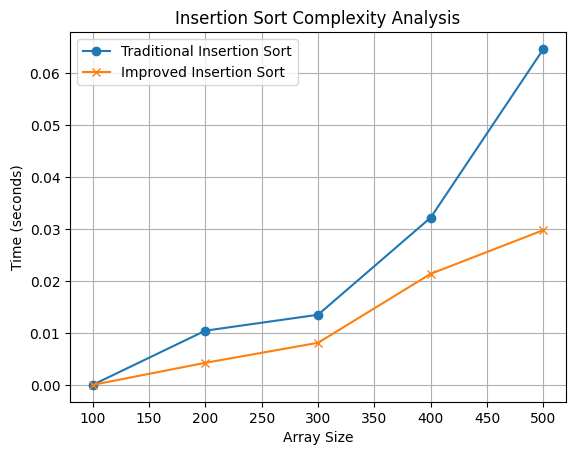

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Traditional Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Improved Insertion Sort
def improved_insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        left, right = 0, i - 1
        while left <= right:
            mid = left + (right - left) // 2
            if arr[mid] < key:
                left = mid + 1
            else:
                right = mid - 1
        for j in range(i, left, -1):
            arr[j] = arr[j - 1]
        arr[left] = key
    return arr

# Generate a reverse sorted array
def generate_reverse_sorted_array(n):
    return list(range(n, 0, -1))

# Complexity analysis
sizes = [100, 200, 300, 400, 500]
traditional_times = []
improved_times = []

for size in sizes:
    arr = generate_reverse_sorted_array(size)
    start_time = time.time()
    insertion_sort(arr.copy())
    traditional_times.append(time.time() - start_time)

    arr = generate_reverse_sorted_array(size)
    start_time = time.time()
    improved_insertion_sort(arr.copy())
    improved_times.append(time.time() - start_time)

# Plotting the results
plt.plot(sizes, traditional_times, label='Traditional Insertion Sort', marker='o')
plt.plot(sizes, improved_times, label='Improved Insertion Sort', marker='x')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Insertion Sort Complexity Analysis')
plt.legend()
plt.grid()
plt.show()

In [7]:
import heapq

def merge_sorted_lists(lists):
    # Step 1: Initialize a min-heap
    min_heap = []
    
    # Step 2: Insert the first element of each list into the heap
    for i in range(len(lists)):
        if lists[i]:  # Check if the list is not empty
            heapq.heappush(min_heap, (lists[i][0], i, 0))  # (value, list_index, element_index)

    # Step 3: Extract the minimum element and push the next element from the same list
    sorted_output = []
    
    while min_heap:
        value, list_index, element_index = heapq.heappop(min_heap)  # Get the smallest element
        sorted_output.append(value)  # Add it to the output
        
        # If there is a next element in the same list, push it to the heap
        if element_index + 1 < len(lists[list_index]):
            next_value = lists[list_index][element_index + 1]
            heapq.heappush(min_heap, (next_value, list_index, element_index + 1))

    return sorted_output

# Example usage
sorted_lists = [
    [10, 20, 30, 40],
    [15, 25, 35, 45],
    [27, 29, 37, 48],
    [32, 33, 39, 50],
    [16, 18, 22, 28]
]

result = merge_sorted_lists(sorted_lists)
print(result)  # Output: [10, 15, 16, 18, 20, 22, 25, 27, 28, 29, 30, 32, 33, 35, 37, 39, 40, 45, 48, 50]

[10, 15, 16, 18, 20, 22, 25, 27, 28, 29, 30, 32, 33, 35, 37, 39, 40, 45, 48, 50]


In [6]:
import heapq

def find_k_largest_elements(arr, k):
    # Step 1: Initialize a min-heap
    min_heap = []
    
    # Step 2: Iterate through the array
    for num in arr:
        # If the heap has fewer than k elements, add the current number
        if len(min_heap) < k:
            heapq.heappush(min_heap, num)
        # If the heap is full and the current number is larger than the smallest in the heap
        elif num > min_heap[0]:
            heapq.heappop(min_heap)  # Remove the smallest element
            heapq.heappush(min_heap, num)  # Add the current number
    
    # Step 3: Extract the K largest elements from the heap
    k_largest = list(min_heap)
    
    # Step 4: Sort the result in descending order
    k_largest.sort(reverse=True)
    
    return k_largest

# Example usage
arr = [1, 23, 12, 9, 30, 2, 50]
k = 3
result = find_k_largest_elements(arr, k)
print(result)  # Output: [50, 30, 23]

[50, 30, 23]


In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x > pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x < pivot]
    return quicksort(left) + middle + quicksort(right)

def find_k_largest_elements(arr, k):
    # Step 1: Sort the array in descending order
    sorted_arr = quicksort(arr)
    
    # Step 2: Return the first k elements
    return sorted_arr[:k]

# Example usage
arr = [1, 23, 12, 9, 30, 2, 50]
k = 3
result = find_k_largest_elements(arr, k)
print(result)  # Output: [50, 30, 23]


[50, 30, 23]


In [1]:
def activity_selection(activities):
    # Sort activities based on their finish time
    activities.sort(key=lambda x: x[1])

    # The first activity always gets selected
    selected_activities = [activities[0]]
    last_finish_time = activities[0][1]

    for i in range(1, len(activities)):
        if activities[i][0] >= last_finish_time:
            selected_activities.append(activities[i])
            last_finish_time = activities[i][1]

    return selected_activities

# Example usage:
activities = [(1, 3), (2, 4), (3, 5), (0, 6), (5, 7), (8, 9), (5, 9)]
print("The maximum number of activities that can be performed are:", len(activity_selection(activities)))


The maximum number of activities that can be performed are: 4


In [4]:
# given a unsorted integer array find a pair with the given sum in it 
#ex: [8,7,3,2,1,5]
def find_pair_with_sum(arr, target_sum):
    # Create an empty set to store the elements
    seen = set()
    
    # Iterate through each element in the array
    for num in arr:
        # Calculate the complement
        complement = target_sum - num
        
        # Check if the complement is in the set
        if complement in seen:
            return (complement, num)
        
        # Add the current number to the set
        seen.add(num)
    
    # If no pair is found, return None
    return None

# Example usage
arr =input()
arr = [8, 7, 3, 2, 1, 5]
target_sum = 10
result = find_pair_with_sum(arr, target_sum)
print(result)  # Output: (3, 7) or (7, 3)


(7, 3)


In [3]:
import math
import heapq

def introsort(arr):
    max_depth = 2 * math.log2(len(arr))
    _introsort(arr, 0, len(arr) - 1, int(max_depth))

def _introsort(arr, start, end, max_depth):
    if start >= end:
        return

    if max_depth == 0:
        heapq_sort(arr, start, end)
    else:
        pivot = partition(arr, start, end)
        _introsort(arr, start, pivot - 1, max_depth - 1)
        _introsort(arr, pivot + 1, end, max_depth - 1)

def partition(arr, start, end):
    pivot = arr[end]
    i = start
    for j in range(start, end):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[end] = arr[end], arr[i]
    return i

def heapq_sort(arr, start, end):
    # Using heapq to sort the segment of the array
    heap = arr[start:end+1]
    heapq.heapify(heap)
    for i in range(start, end + 1):
        arr[i] = heapq.heappop(heap)

# Example usage:
arr = [10, 3, 76, 34, 23, 32]
introsort(arr)
print("Sorted array:", arr)


Sorted array: [3, 10, 23, 32, 34, 76]
